In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Instacart Kaggle/opf2.csv')

In [3]:
df = df.rename(columns = {"avg(flex_freq_1)": 'avg_flex_freq'})
df = df.rename(columns = {"stddev_pop(flex_freq_2)": 'stddev_flex_freq'})

In [4]:
df = df.rename(columns = {"max(count_user_prod)": 'count_user_prod'})

In [5]:
df.product_id = df.product_id.astype(np.int32)
df.user_id = df.user_id.astype(np.int32)
df.count_user_prod = df.count_user_prod.astype(np.int32)
df.avg_flex_freq = np.around(df.avg_flex_freq, decimals=1)
df.stddev_flex_freq = np.around(df.stddev_flex_freq, decimals=1)

In [6]:
df['cv'] = df.stddev_flex_freq/df.avg_flex_freq

In [7]:
df = df.dropna(how='any',axis=0)

In [8]:
df.cv = np.around(df.cv, decimals=2)

In [9]:
df = df[df > 0]
df = df[df.cv < 1]

In [10]:
df = df.reset_index(drop=True)

In [11]:
df.head()

,user_id,product_id,count_user_prod,avg_flex_freq,stddev_flex_freq,cv
0,7,29993,3,41.5,9.5,0.23
1,50,31528,3,29.0,15.0,0.52
2,71,6336,6,16.2,7.8,0.48
3,91,8638,4,6.3,5.5,0.87
4,197,3918,4,3.9,2.9,0.74


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179894 entries, 0 to 2179893
Data columns (total 6 columns):
user_id             int32
product_id          int32
count_user_prod     int32
avg_flex_freq       float64
stddev_flex_freq    float64
cv                  float64
dtypes: float64(3), int32(3)
memory usage: 74.8 MB


In [13]:
df.describe()

,user_id,product_id,count_user_prod,avg_flex_freq,stddev_flex_freq,cv
count,2.179894e+06,2.179894e+06,2.179894e+06,2.179894e+06,2.179894e+06,2.179894e+06
mean,1.029019e+05,2.569642e+04,4.826255e+00,2.214366e+01,1.250650e+01,5.654440e-01
std,5.945206e+04,1.411804e+04,2.724840e+00,2.117468e+01,1.560151e+01,2.519110e-01
min,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e-01,1.000000e-01,1.000000e-02
25%,5.147500e+04,1.365500e+04,3.000000e+00,8.100000e+00,3.500000e+00,3.800000e-01
50%,1.025420e+05,2.564000e+04,4.000000e+00,1.520000e+01,7.500000e+00,5.900000e-01
75%,1.544170e+05,3.822600e+04,5.000000e+00,2.820000e+01,1.480000e+01,7.700000e-01
max,2.062090e+05,4.968800e+04,5.000000e+01,1.798000e+02,1.772000e+02,9.900000e-01


(array([ 101209.,  132656.,  155897.,  213235.,  220183.,  284556.,
         304589.,  294372.,  265212.,  207985.]),
 array([ 0.01 ,  0.108,  0.206,  0.304,  0.402,  0.5  ,  0.598,  0.696,
         0.794,  0.892,  0.99 ]),
 <a list of 10 Patch objects>)

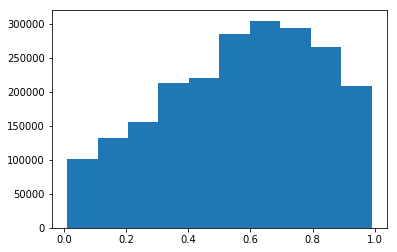

In [14]:
plt.hist(df.cv)

cut on cv <= 1
total lenght 2.182.327
unique values for products 37.955
unique values for users 162.450
memory usage 83.2 MB

cut on cv <= 0.4
total lenght 603.852
unique values for products 29.364
unique values for users 136.780
memory usage  23.0 MB

cut on cv <= 0.1
total lenght 102.064
unique values for products 16.003 
unique values for users 61.721
memory usage  3.9 MB


In [15]:
df_01 = df[df.cv <= 0.1]
df_01 = df_01.reset_index(drop=True)
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101209 entries, 0 to 101208
Data columns (total 6 columns):
user_id             101209 non-null int32
product_id          101209 non-null int32
count_user_prod     101209 non-null int32
avg_flex_freq       101209 non-null float64
stddev_flex_freq    101209 non-null float64
cv                  101209 non-null float64
dtypes: float64(3), int32(3)
memory usage: 3.5 MB


In [16]:
df_01.describe()

,user_id,product_id,count_user_prod,avg_flex_freq,stddev_flex_freq,cv
count,101209.00000,101209.000000,101209.000000,101209.000000,101209.000000,101209.000000
mean,102812.26057,25689.350078,3.087463,26.688627,1.503354,0.057191
std,59519.11653,14168.279567,0.309517,20.429664,1.475244,0.027949
min,2.00000,1.000000,3.000000,1.100000,0.100000,0.010000
25%,51225.00000,13609.000000,3.000000,12.000000,0.500000,0.030000
50%,102596.00000,25705.000000,3.000000,20.800000,1.000000,0.060000
75%,154429.00000,38274.000000,3.000000,33.900000,2.000000,0.080000
max,206209.00000,49683.000000,8.000000,119.500000,12.500000,0.100000


In [17]:
df_01['freq_perc'] = pd.qcut(df_01.avg_flex_freq, 4, labels=[1, 2, 3, 4])
df_01.freq_perc = df_01.freq_perc.astype(np.int32)

In [18]:
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise import dump
from surprise.accuracy import rmse

In [19]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 4))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df_01[['user_id', 'product_id', 'freq_perc']], reader)
# Split it into 2 folds 
data.split(n_folds=2)

In [20]:
# We'll use a basic nearest neighbor approach, where similarities are computed
# between items.
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBasic(sim_options=sim_options)  

In [21]:
for trainset, testset in data.folds(): 
    algo.train(trainset)                             
    predictions = algo.test(testset)
    rmse(predictions)
                                                                               
    dump.dump('./dump_file', predictions, algo)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1179
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1197


In [22]:
# The dump has been saved and we can now use it whenever we want.
# Let's load it and see what we can do
predictions, algo = dump.load('./dump_file')

In [23]:
trainset = algo.trainset
print('algo: {0}, k = {1}, min_k = {2}'.format(algo.__class__.__name__, algo.k, algo.min_k))

algo: KNNBasic, k = 40, min_k = 1


In [24]:
len(predictions)

50604

In [25]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_pred['Iu'] = df_pred.uid.apply(get_Iu)
df_pred['Ui'] = df_pred.iid.apply(get_Ui)
df_pred['err'] = abs(df_pred.est - df_pred.rui)

In [26]:
df_pred.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,142038,28985,2.0,2.497895,"{'was_impossible': True, 'reason': 'User and/o...",0,99,0.497895
1,192829,18465,3.0,2.497895,"{'was_impossible': True, 'reason': 'User and/o...",0,67,0.502105
2,188709,38650,2.0,2.497895,"{'was_impossible': True, 'reason': 'Not enough...",1,13,0.497895
3,183418,26683,1.0,2.497895,"{'was_impossible': True, 'reason': 'User and/o...",0,4,1.497895
4,205715,39275,1.0,2.497895,"{'was_impossible': True, 'reason': 'User and/o...",0,163,1.497895


In [27]:
best_predictions = df_pred.sort_values(by='err')[:10]
worst_predictions = df_pred.sort_values(by='err')[-10:]

In [28]:
# Let's take a look at the best predictions of the algorithm
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
13249,21271,24852,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",2,394,0.0
48719,119258,21137,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",1,317,0.0
34104,104289,13176,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",1,297,0.0
43647,97473,24852,2.0,2.0,"{'actual_k': 1, 'was_impossible': False}",1,394,0.0
9912,128343,34358,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",1,69,0.0
36421,100427,1158,2.0,2.0,"{'actual_k': 1, 'was_impossible': False}",1,34,0.0
5784,70696,31717,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",2,146,0.0
48675,196053,21137,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",3,317,0.0
2357,141830,24852,2.0,2.0,"{'actual_k': 1, 'was_impossible': False}",5,394,0.0
527,88675,40604,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",2,69,0.0


In [29]:
# Now, let's look at the prediction with the biggest error
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
16279,204039,19057,1.0,4.0,"{'actual_k': 1, 'was_impossible': False}",1,74,3.0
19837,134303,260,1.0,4.0,"{'actual_k': 1, 'was_impossible': False}",2,35,3.0
10906,146286,47626,4.0,1.0,"{'actual_k': 1, 'was_impossible': False}",1,272,3.0
41108,162782,21903,4.0,1.0,"{'actual_k': 1, 'was_impossible': False}",2,333,3.0
47805,191407,48745,1.0,4.0,"{'actual_k': 1, 'was_impossible': False}",1,35,3.0
23465,101210,2078,1.0,4.0,"{'actual_k': 1, 'was_impossible': False}",2,30,3.0
4170,156522,9020,1.0,4.0,"{'actual_k': 1, 'was_impossible': False}",1,21,3.0
4349,202877,16797,4.0,1.0,"{'actual_k': 1, 'was_impossible': False}",1,196,3.0
2391,71072,10749,1.0,4.0,"{'actual_k': 1, 'was_impossible': False}",1,85,3.0
9943,138136,21903,1.0,4.0,"{'actual_k': 1, 'was_impossible': False}",1,333,3.0


#changing the min_k didn't influence the RMSE stayed around 1.119


1.run in the test set and submit in kaggle.

2.try SVD too

In [31]:
details = pd.DataFrame.from_records(df_pred.details)
details.head()

,actual_k,reason,was_impossible
0,NaN,User and/or item is unkown.,True
1,NaN,User and/or item is unkown.,True
2,NaN,Not enough neighbors.,True
3,NaN,User and/or item is unkown.,True
4,NaN,User and/or item is unkown.,True


In [32]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50604 entries, 0 to 50603
Data columns (total 3 columns):
actual_k          827 non-null float64
reason            49777 non-null object
was_impossible    50604 non-null bool
dtypes: bool(1), float64(1), object(1)
memory usage: 840.2+ KB


In [33]:
details.reason.value_counts()

User and/or item is unkown.    31466
Not enough neighbors.          18311
Name: reason, dtype: int64